# **INTELIGÊNCIA ARTIFICIAL**

**Discentes:** Danilo Soares, Enya Santos, João Vitor Vaz, Nathann Zini e Vitória Bispo 

**Docente**: Jadson Castro Gertrudes

---


## Importação das Bibliotecas Necessárias

In [1]:
#from google.colab import files
import io

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler

import warnings


In [2]:
pd.set_option('max_colwidth', 800)

## Utils

Funções úteis utilizadas ao longo do projeto

In [3]:
def ShowMetrics(model, y_test, y_pred):
  print(classification_report(y_test, y_pred, target_names=["Não falência", "Falência"]))

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  score = f1_score(y_test, y_pred, average='weighted')
  print("F-Measure (weighted): %.3f" % score)
  print("Accuracy: %.3f" % accuracy)
  print("Precision: %.3f" % precision)
  print("Recall: %.3f" % recall)

In [4]:
def ShowConfusionMatrix(model, y_test, y_pred):
  print("Confusion Matrix")
  cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
  ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Não falência", "Falência"]).plot()
  plt.grid(False)
  plt.show()

In [5]:
def ShowResults(model, y_test, y_pred):
  ShowMetrics(model, y_test, y_pred)
  print("")
  ShowConfusionMatrix(model, y_test, y_pred)

## Carregamento da Base de Dados



Carregamento da base de dados utilizada no projeto.

In [127]:
#uploaded = files.upload()

In [6]:
dataset = pd.read_csv("./falencia-treinamento.csv", sep=";")

In [129]:
#dataset = pd.read_csv(io.BytesIO(uploaded['falencia-treinamento.csv']), sep=";")

## Análise dos Dados 

In [7]:
dataset.head()

,Unnamed: 0,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,M2,M3,M4,M5,M6,M7,M8,M9,M10,Resultado
0,0,3.26,6.56,3.97,5.23,1.06,5.23,3.76,4.49,5.70,...,5.58,8.19,2.25,5.68,4.44,7.64,4.44,7.57,7.50,0
1,1,4.13,7.38,3.46,4.92,4.45,4.92,3.52,5.64,6.22,...,7.60,7.16,7.55,5.85,5.26,7.38,5.26,6.91,6.00,0
2,2,1.12,6.19,2.03,6.02,7.82,6.02,2.05,4.07,8.11,...,7.58,5.67,2.66,4.08,6.38,6.06,6.38,4.52,4.99,0
3,3,5.03,6.71,1.87,6.44,7.81,6.44,6.30,4.27,8.07,...,7.92,6.22,6.28,3.79,7.06,6.41,7.06,4.48,4.52,0
4,4,8.95,6.39,5.13,4.13,0.20,4.13,4.87,5.45,4.44,...,5.26,7.84,6.87,6.52,3.48,7.40,3.48,8.07,7.66,0


In [8]:
n = dataset.shape
print("Dataset possui ", n[1], " linhas e ", n[0] ," colunas\n")

Dataset possui  22  linhas e  400  colunas



In [9]:
x = dataset.drop_duplicates()
print("Há ", n[0] - x.shape[0], " rows duplicadas.")

Há  0  rows duplicadas.


In [10]:
n = dataset.dtypes
print("Tipo de dados de cada coluna:\n", n)

Tipo de dados de cada coluna:
 Unnamed: 0      int64
I1            float64
I2            float64
I3            float64
I4            float64
I5            float64
I6            float64
I7            float64
I8            float64
I9            float64
I10           float64
M1            float64
M2            float64
M3            float64
M4            float64
M5            float64
M6            float64
M7            float64
M8            float64
M9            float64
M10           float64
Resultado       int64
dtype: object


In [11]:
n = dataset.isnull().sum()
print("Número de atributos nulos em cada coluna:\n", n)

Número de atributos nulos em cada coluna:
 Unnamed: 0    0
I1            0
I2            0
I3            0
I4            0
I5            0
I6            0
I7            0
I8            0
I9            0
I10           0
M1            0
M2            0
M3            0
M4            0
M5            0
M6            0
M7            0
M8            0
M9            0
M10           0
Resultado     0
dtype: int64


In [12]:
n = dataset.nunique(axis=0)
print("Número de atributos únicos em cada coluna:\n", n)

Número de atributos únicos em cada coluna:
 Unnamed: 0    400
I1            305
I2            294
I3            294
I4            283
I5            301
I6            283
I7            296
I8            275
I9            292
I10           294
M1            279
M2            297
M3            288
M4            298
M5            286
M6            292
M7            283
M8            292
M9            291
M10           283
Resultado       2
dtype: int64


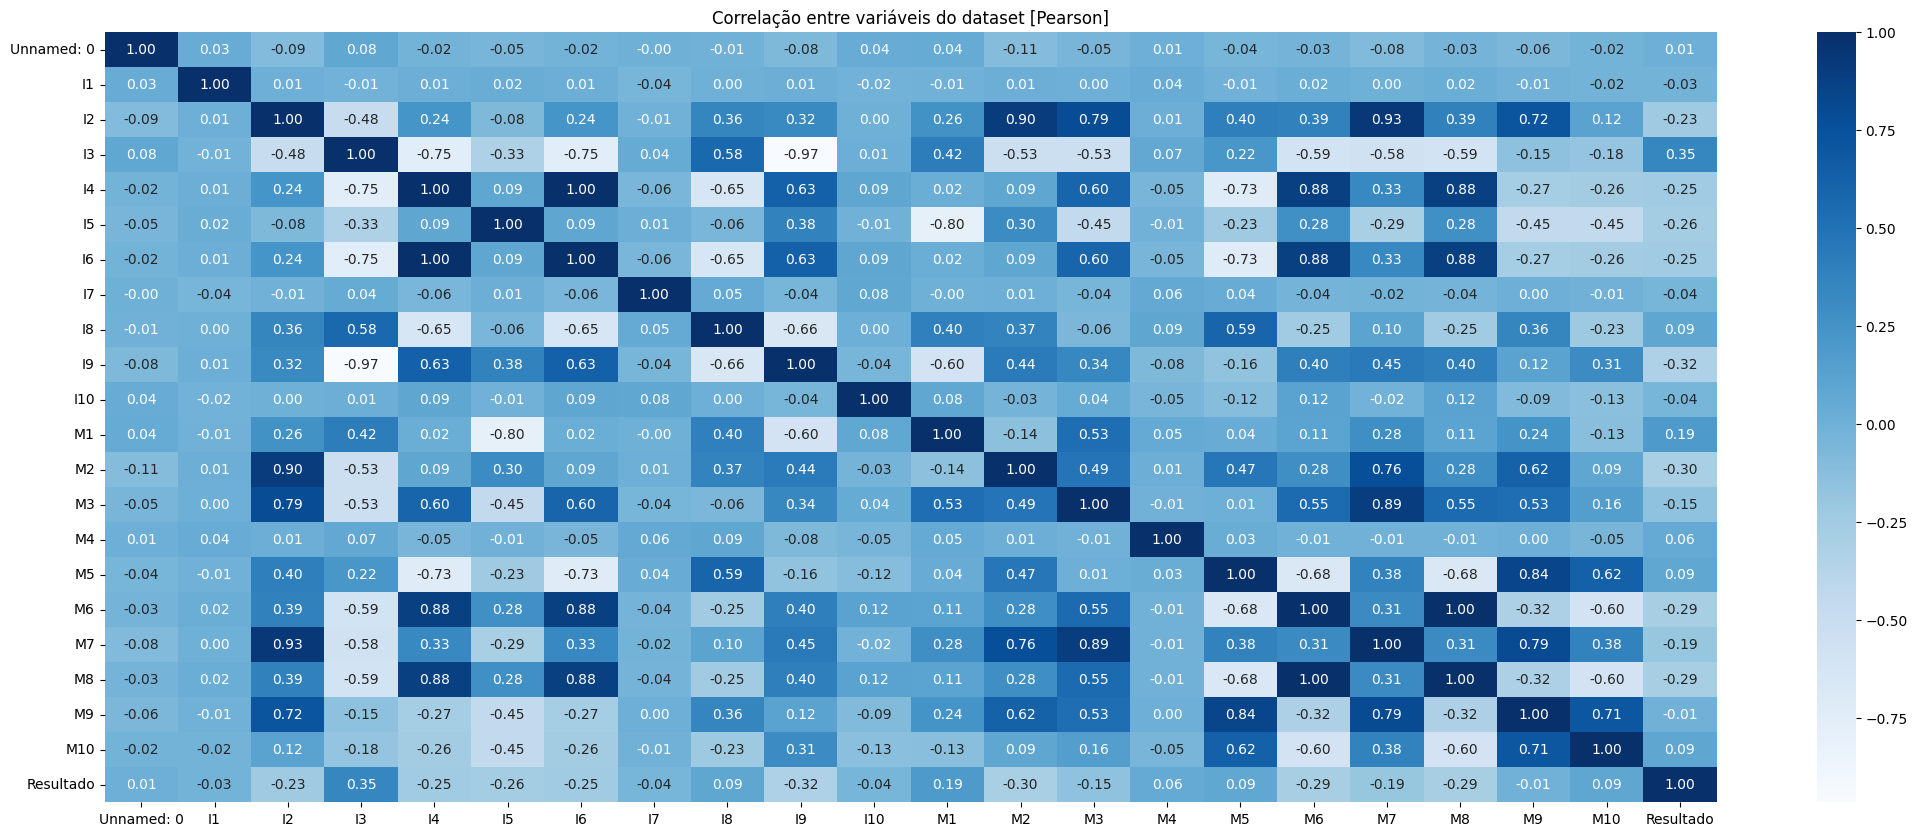

In [13]:
plt.figure(figsize=(26, 10))
sns.heatmap(dataset.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset [Pearson]')
plt.show()

#### Feature com redundancia
Analisando a matriz de correlação com o método de Pearson, podemos dizer que os seguintes as seguintes feature são redundantes pois possuem 1 de correlação entre eles.
*   I6 e I4
*   M6 e M8

### (Des)balanceamento dos dados


0    277
1    123
Name: Resultado, dtype: int64
\Falência representam 30.7500% do dataset.



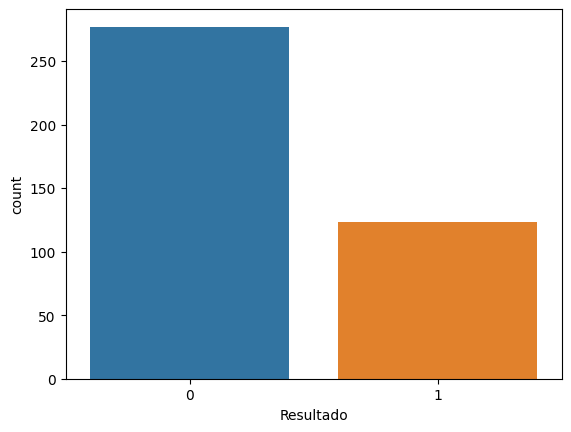

In [14]:
print(dataset['Resultado'].value_counts())
print("\Falência representam {:.4f}% do dataset.\n".format((dataset[dataset['Resultado'] == 1].shape[0] / dataset.shape[0]) * 100))
sns.countplot(x=dataset['Resultado']);

Como apresentado no grafico acima, a base de dados apresenta um desbalanceamento, pois não flência (0) representam 69.25% e falência (1) representam 30.75% do dataset.

## Limpeza e Transformação dos Dados

Removendo feature com redundância e não uteis para o treinamento

In [15]:
dt = dataset.drop([ 'Unnamed: 0' ,'M6', 'I4'], axis=1)
#dt = dataset[colums]

In [16]:
dt.head()

,I1,I2,I3,I5,I6,I7,I8,I9,I10,M1,M2,M3,M4,M5,M7,M8,M9,M10,Resultado
0,3.26,6.56,3.97,1.06,5.23,3.76,4.49,5.70,6.46,7.71,5.58,8.19,2.25,5.68,7.64,4.44,7.57,7.50,0
1,4.13,7.38,3.46,4.45,4.92,3.52,5.64,6.22,4.37,5.96,7.60,7.16,7.55,5.85,7.38,5.26,6.91,6.00,0
2,1.12,6.19,2.03,7.82,6.02,2.05,4.07,8.11,2.04,3.12,7.58,5.67,2.66,4.08,6.06,6.38,4.52,4.99,0
3,5.03,6.71,1.87,7.81,6.44,6.30,4.27,8.07,6.44,3.56,7.92,6.22,6.28,3.79,6.41,7.06,4.48,4.52,0
4,8.95,6.39,5.13,0.20,4.13,4.87,5.45,4.44,3.16,8.50,5.26,7.84,6.87,6.52,7.40,3.48,8.07,7.66,0


## Divisão de dados

In [17]:
X = dt.drop('Resultado', axis=1)
y = dt['Resultado']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Modelos - Versão 1.0 

### Configurações

In [19]:
model_params = {
    'logistic_regression' : {
        'model': LogisticRegression(multi_class='auto'),
        'params': [
            {"C":np.logspace(-4, 4, 50), 
             "penalty":["l1"], 
             "solver": ['liblinear'], 
             'max_iter': [500, 1000, 5000]},
            {"C":np.logspace(-4, 4, 50), 
             "penalty":["l2"], 
             "solver": ['liblinear', 'lbfgs', 'newton-cg', 'newton-cholesky'], 
             'max_iter': [500, 1000, 5000]}
        ]
    },
   'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params':{
            'max_features': ['sqrt', 'log2', None],
            'ccp_alpha': [0.1, .01, .001],
            'criterion' :['gini', 'entropy'],
            'max_depth': [2,4,10,12,14],
            'min_samples_split': [2,3,4],
            'min_samples_leaf': [1,2],
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
        'max_features': ['sqrt', 'log2', None],
            'n_estimators': [1,5,10,20,30,50],
            'criterion':['gini','entropy'],
            'max_depth' : [4,5,6,7,8],
            'n_jobs': [-1]
        }
    }
}

In [20]:
scores_config = {'accuracy' :make_scorer(accuracy_score),
               'recall'   :make_scorer(recall_score),
               'precision':make_scorer(precision_score),
               'f1'       :make_scorer(f1_score, average='weighted')}

In [21]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=6, verbose=1, n_jobs=-1, scoring=scores_config, refit='precision', return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

Fitting 6 folds for each of 750 candidates, totalling 4500 fits
Fitting 6 folds for each of 540 candidates, totalling 3240 fits
Fitting 6 folds for each of 180 candidates, totalling 1080 fits


,model,best_score,best_params
0,logistic_regression,0.895238,"{'C': 0.02811768697974228, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}"
1,decision_tree,0.781288,"{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 4}"
2,random_forest,0.802956,"{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 50, 'n_jobs': -1}"


### Logistic Regression

In [22]:
logreg = LogisticRegression(C=0.02811768697974228, penalty='l1', max_iter=500, solver='liblinear')

              precision    recall  f1-score   support

Não falência       0.75      1.00      0.86        59
    Falência       1.00      0.05      0.09        21

    accuracy                           0.75        80
   macro avg       0.87      0.52      0.47        80
weighted avg       0.81      0.75      0.65        80

F-Measure (weighted): 0.654
Accuracy: 0.750
Precision: 1.000
Recall: 0.048

Confusion Matrix


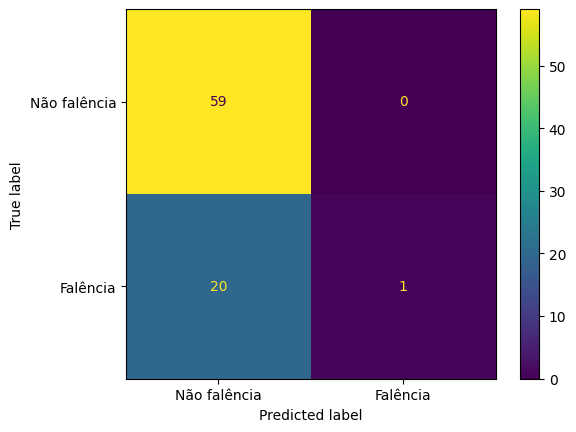

In [23]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
ShowResults(logreg, y_test, y_pred)

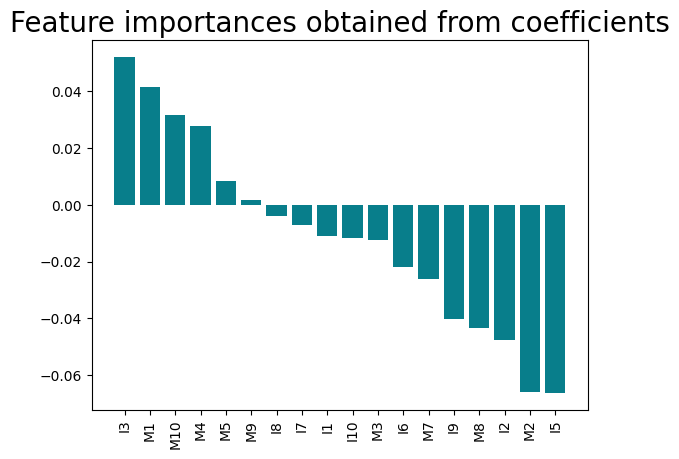

In [324]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': logreg.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### Decision Tree 

In [27]:
dectree = DecisionTreeClassifier(ccp_alpha=0.01, class_weight=None, criterion='gini', max_depth=4, max_features='log2', min_samples_leaf=2, min_samples_split=4)

In [28]:
dectree.fit(X_train, y_train)
y_pred_dectree = dectree.predict(X_test)

              precision    recall  f1-score   support

Não falência       0.85      0.85      0.85        59
    Falência       0.57      0.57      0.57        21

    accuracy                           0.78        80
   macro avg       0.71      0.71      0.71        80
weighted avg       0.78      0.78      0.78        80

F-Measure (weighted): 0.775
Accuracy: 0.775
Precision: 0.571
Recall: 0.571

Confusion Matrix


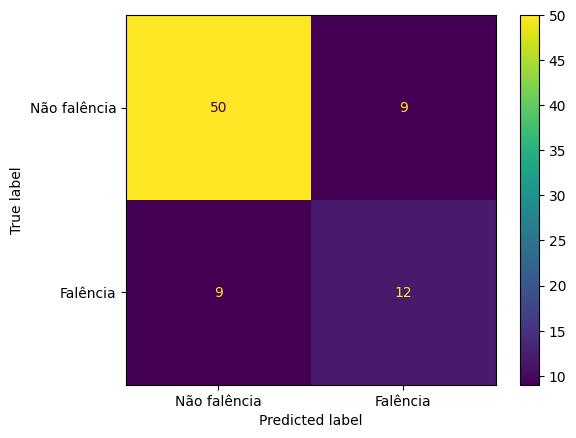

In [29]:
ShowResults(dectree, y_test, y_pred_dectree)

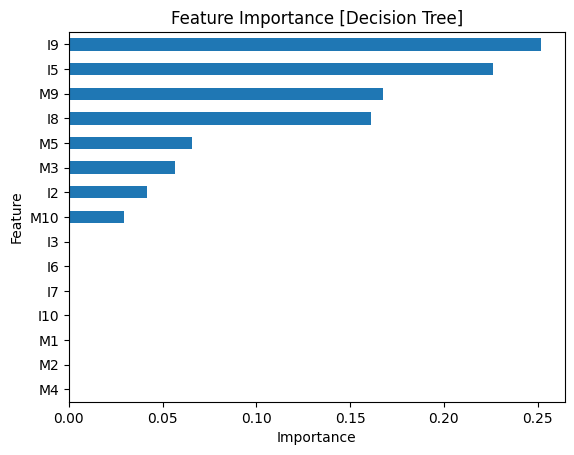

In [328]:
importances = dectree.feature_importances_

feat_imp = pd.Series(importances, index=X_train.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind="barh")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance [Decision Tree]");

### Random Forests

In [30]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2', n_estimators=50, n_jobs=-1)

In [31]:
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

              precision    recall  f1-score   support

Não falência       0.91      0.85      0.88        59
    Falência       0.64      0.76      0.70        21

    accuracy                           0.82        80
   macro avg       0.77      0.80      0.79        80
weighted avg       0.84      0.82      0.83        80

F-Measure (weighted): 0.830
Accuracy: 0.825
Precision: 0.640
Recall: 0.762

Confusion Matrix


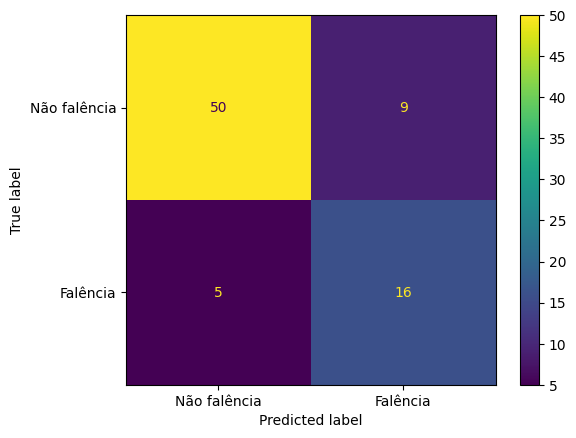

In [32]:
ShowResults(rfc, y_test, y_pred_rfc)

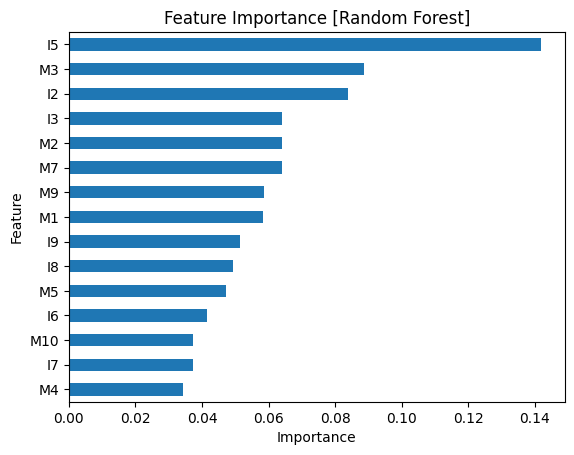

In [332]:
importances = rfc.feature_importances_

feat_imp = pd.Series(importances, index=X_train.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind="barh")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance [Random Forest]");

## Modelos - Versão 2.0

Utilização de balancemanto dos dados com SMOTE (OverSampling) e transformação da escala dos dados com StandardScaler.
Os dados transformados com StandardScaler só relevantes e promissores no modelo de Logistic Regression, pois nos modelos com árvores não fazem diferança no resultado final.

Resampled dataset shape Counter({0: 218, 1: 218})


<Axes: >

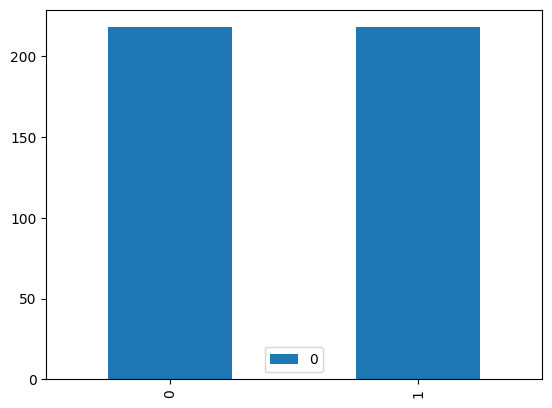

In [33]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)
d = Counter(y_sm)
print('Resampled dataset shape {}'.format(d))
d = pd.DataFrame.from_dict(d, orient='index')
d.plot.bar()

Fazendo a divisão dos dados balanceados

In [34]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2)

Fazendo escalonamento dos dados

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test_sm)

#### Grid

In [36]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=6, verbose=1, n_jobs=-1, scoring=scores_config, refit='precision', return_train_score=False)
    clf.fit(X_train_scaled, y_train_sm)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

Fitting 6 folds for each of 750 candidates, totalling 4500 fits
Fitting 6 folds for each of 540 candidates, totalling 3240 fits
Fitting 6 folds for each of 180 candidates, totalling 1080 fits


,model,best_score,best_params
0,logistic_regression,0.736088,"{'C': 0.0001, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}"
1,decision_tree,0.851791,"{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 12, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 3}"
2,random_forest,0.868711,"{'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'n_estimators': 10, 'n_jobs': -1}"


#### Logistic Regression

              precision    recall  f1-score   support

Não falência       0.75      0.75      0.75        44
    Falência       0.75      0.75      0.75        44

    accuracy                           0.75        88
   macro avg       0.75      0.75      0.75        88
weighted avg       0.75      0.75      0.75        88

F-Measure (weighted): 0.750
Accuracy: 0.750
Precision: 0.750
Recall: 0.750

Confusion Matrix


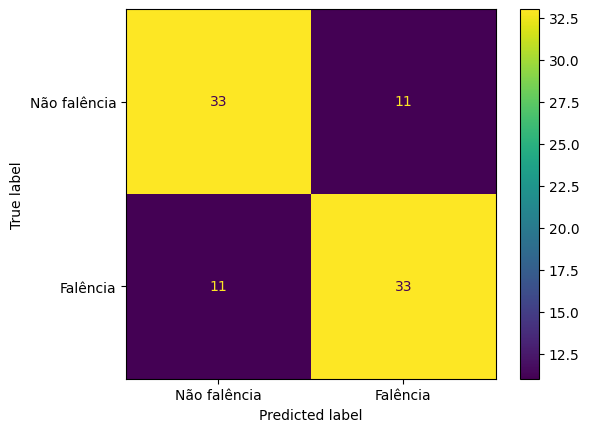

In [37]:
logreg_2 = LogisticRegression(C=0.0001, penalty='l2', max_iter=500, solver='liblinear')
logreg_2.fit(X_train_scaled, y_train_sm)
y_pred_logreg_2 = logreg_2.predict(X_test_scaled)
ShowResults(logreg_2, y_test_sm, y_pred_logreg_2)

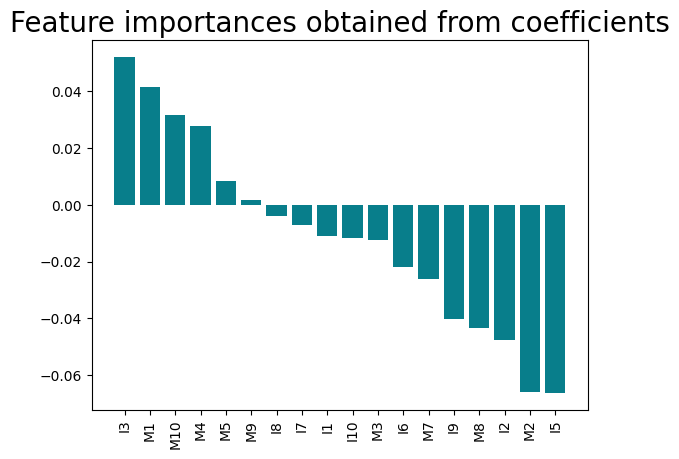

In [337]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': logreg.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

#### Decision Tree 

              precision    recall  f1-score   support

Não falência       0.92      0.82      0.87        44
    Falência       0.84      0.93      0.88        44

    accuracy                           0.88        88
   macro avg       0.88      0.88      0.87        88
weighted avg       0.88      0.88      0.87        88

F-Measure (weighted): 0.875
Accuracy: 0.875
Precision: 0.837
Recall: 0.932

Confusion Matrix


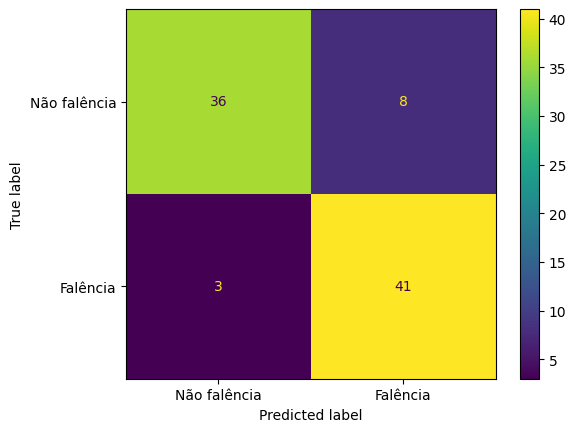

In [38]:
dectree_2 = DecisionTreeClassifier(ccp_alpha= 0.01, class_weight= None, criterion= 'gini', max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=3)
dectree_2.fit(X_train_sm, y_train_sm)
y_pred_dectree_2 = dectree_2.predict(X_test_sm)
ShowResults(dectree_2, y_test_sm, y_pred_dectree_2)

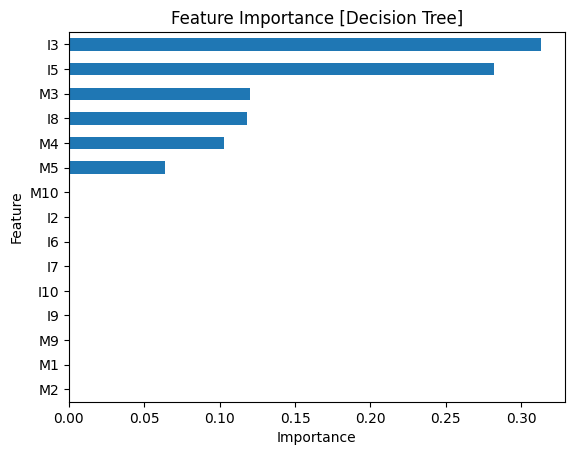

In [40]:
importances = dectree_2.feature_importances_

feat_imp = pd.Series(importances, index=X_train.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind="barh")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance [Decision Tree]");

#### Random Forests

              precision    recall  f1-score   support

Não falência       0.91      0.89      0.90        44
    Falência       0.89      0.91      0.90        44

    accuracy                           0.90        88
   macro avg       0.90      0.90      0.90        88
weighted avg       0.90      0.90      0.90        88

F-Measure (weighted): 0.898
Accuracy: 0.898
Precision: 0.889
Recall: 0.909

Confusion Matrix


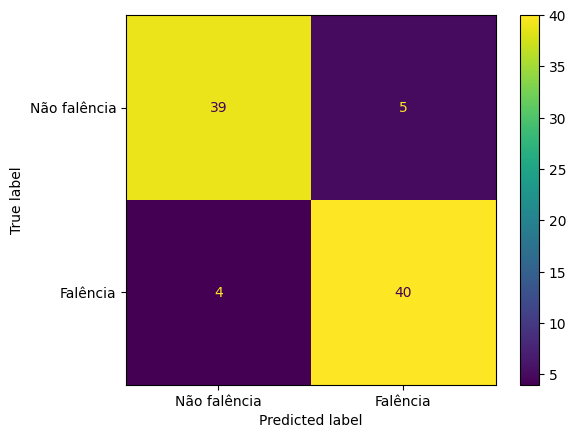

In [57]:
rfc_2 = RandomForestClassifier(criterion='gini', max_depth=12, max_features=None, n_estimators=10, n_jobs=-1)
rfc_2.fit(X_train_sm, y_train_sm)
y_pred_rfc_2 = rfc_2.predict(X_test_sm)
ShowResults(rfc_2, y_test_sm, y_pred_rfc_2)

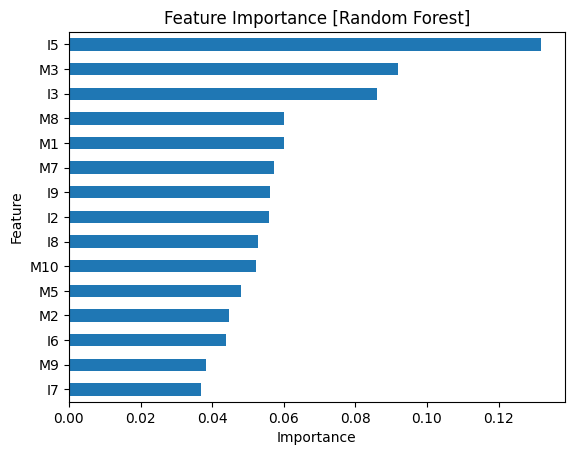

In [58]:
importances = rfc.feature_importances_

feat_imp = pd.Series(importances, index=X_train.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind="barh")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance [Random Forest]");

## Resultados


In [59]:
dataset_test = pd.read_csv("./falencia-teste.csv", sep=";")

In [60]:
dataset_test.head()

,Unnamed: 0,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10
0,0,2.89,3.56,4.31,5.26,2.86,5.26,2.38,3.04,5.84,...,5.83,3.39,5.65,3.58,3.92,4.14,4.92,4.14,4.61,6.74
1,1,7.08,5.88,2.81,6.71,4.02,6.71,6.85,3.47,6.96,...,5.96,5.66,7.38,5.53,3.48,6.36,6.59,6.36,5.00,5.66
2,2,4.09,3.54,3.66,4.85,6.09,4.85,4.81,3.33,6.81,...,3.41,4.71,4.12,3.77,4.10,4.27,4.26,4.27,3.86,6.04
3,3,9.36,3.32,5.93,4.94,3.01,4.94,7.08,4.68,3.62,...,7.39,2.87,5.25,6.81,3.07,4.97,3.92,4.97,3.17,4.42
4,4,3.38,6.48,3.02,6.02,4.87,6.02,5.70,4.48,6.70,...,5.66,6.64,7.03,5.34,4.24,6.19,6.70,6.19,5.38,5.35


In [61]:
dt_test = dataset_test.drop([ 'Unnamed: 0' ,'M6', 'I4'], axis=1)

In [62]:
dt_test.head()

,I1,I2,I3,I5,I6,I7,I8,I9,I10,M1,M2,M3,M4,M5,M7,M8,M9,M10
0,2.89,3.56,4.31,2.86,5.26,2.38,3.04,5.84,4.30,5.83,3.39,5.65,3.58,3.92,4.92,4.14,4.61,6.74
1,7.08,5.88,2.81,4.02,6.71,6.85,3.47,6.96,6.91,5.96,5.66,7.38,5.53,3.48,6.59,6.36,5.00,5.66
2,4.09,3.54,3.66,6.09,4.85,4.81,3.33,6.81,4.57,3.41,4.71,4.12,3.77,4.10,4.26,4.27,3.86,6.04
3,9.36,3.32,5.93,3.01,4.94,7.08,4.68,3.62,4.16,7.39,2.87,5.25,6.81,3.07,3.92,4.97,3.17,4.42
4,3.38,6.48,3.02,4.87,6.02,5.70,4.48,6.70,3.02,5.66,6.64,7.03,5.34,4.24,6.70,6.19,5.38,5.35


In [64]:
result = rfc_2.predict(dt_test)

In [65]:
result = pd.DataFrame(result, columns = ['Resultado'])

In [66]:
result.to_csv(r'./submissao.csv', index=True)